In [472]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns 

In [473]:
df = pd.read_csv('Louisville_Metro_KY_-_Employee_Salary_Data.csv')

In [474]:
# df.drop(columns=['Employee_Name', 'Incentive_Allowance', 'Other'], inplace=True)
df.rename(columns={'CalYear':'Year'}, inplace=True) 
df.sort_values(by='Department', inplace=True)
df.drop(df[df['Year'] != 2021].index, inplace=True)
agg_functions = {'Department': 'first', 'YTD_Total': 'sum'}
# df = df.groupby(df['Department']).aggregate(agg_functions)
df = df.sort_values('YTD_Total', ascending=False)

# df.to_excel("2021.xlsx") 

# print(df)

In [475]:
df['Hr_Rate'] = x = df['Annual_Rate'] / 2080
df['OT_Rate'] = x * 1.5
df['wkly_hr'] = df['Overtime_Rate'] / df['OT_Rate'] / 52 + 40 

In [476]:

over_60 = df.query('wkly_hr >= 60')
# over_60.to_excel("60_plus_hours.xlsx")

In [489]:
df1 = df.query('wkly_hr >= 60')
df1 = df1.sort_values('wkly_hr', ascending=False)

In [478]:
df2 = df.query('YTD_Total >= 1.5 * Annual_Rate')
df2 = df2.sort_values('wkly_hr', ascending=False)
df2.to_excel("60_plus_hrs.xlsx") 


In [508]:
df = df.query('YTD_Total > 1.5* Annual_Rate') 
df = df.sort_values('YTD_Total', ascending=False)
df = df[:20]
df["Name_Department"] = df['Employee_Name'] + '\n' + df['Department']
df['YTD'] = df['YTD_Total'] - df['Annual_Rate']

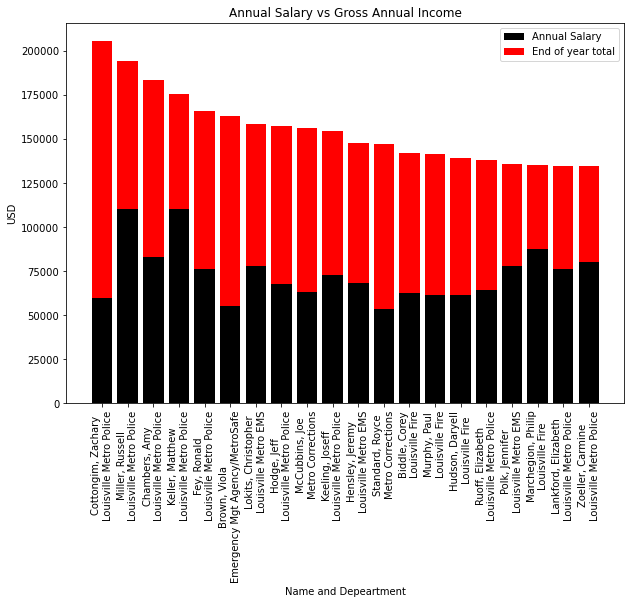

In [516]:
x = df['Name_Department']
y1 = df['Annual_Rate']
y2 = df['YTD']

plt.figure(figsize = (10,7))
plt.tight_layout()
plt.bar(x, y1, color='black', label = 'Annual Salary')
plt.bar(x, y2, bottom=y1, color='r', label = 'End of year total')
plt.title("Annual Salary vs Gross Annual Income")
plt.xlabel("Name and Depeartment")
plt.ylabel("USD")
plt.xticks(rotation='vertical')
plt.legend()
plt.savefig('anl_sal_vs_ytd.jpg', dpi=100, bbox_inches = 'tight')
plt.show()
